<img src="../assets/insurance.JFIF " width=500px high = 900 style="
                                                                   ">

<p style="color:red; font-size:500%; text-align:center;">insurance</p>


In [1]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn import preprocessing
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

# Import the data

In [2]:
data = pd.read_csv('../data/insurance.csv')

# Explore the data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

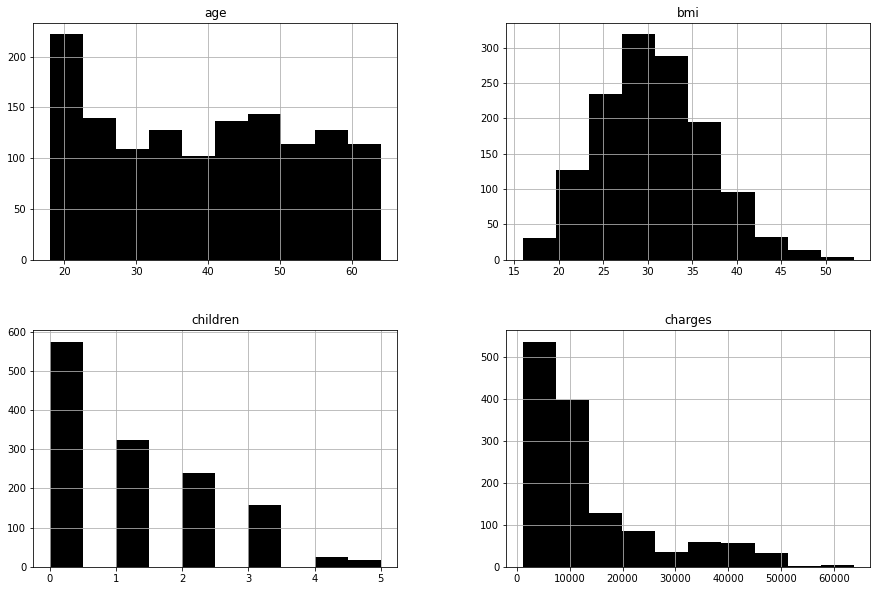

In [6]:
data.hist(figsize=(15,10), color = 'black')
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

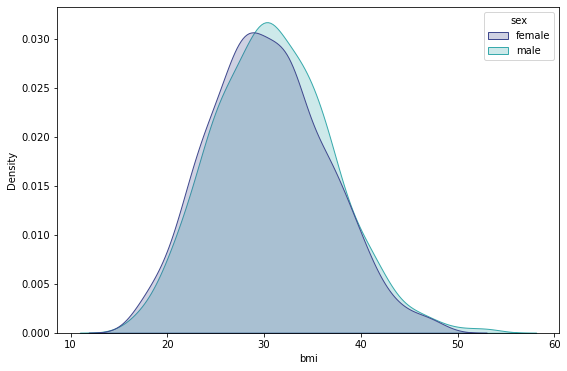

In [7]:
plt.figure(figsize=(9,6))
sns.kdeplot(data = data , x="bmi", hue="sex", shade=True, palette="mako")
plt.show()

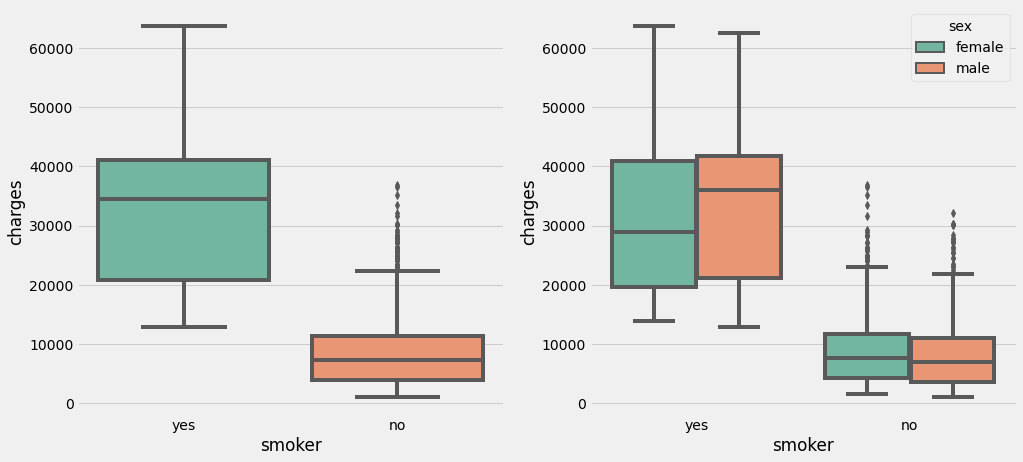

In [8]:
plt.style.use("fivethirtyeight")
fig=plt.figure(figsize=(15,7))
ax=fig.add_subplot(121)
ax=sns.boxplot(data=data, x="smoker",y="charges", palette="Set2")

ax=fig.add_subplot(122)
ax=sns.boxplot(data=data, x="smoker",y="charges", hue="sex", palette="Set2")

plt.show();

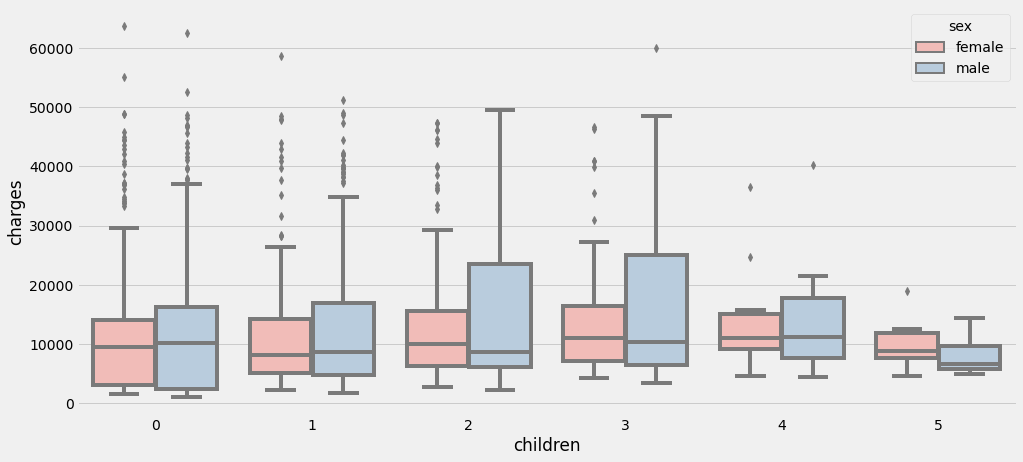

In [9]:
plt.figure(figsize=(15,7))
sns.boxplot(data=data, x="children",y="charges", hue="sex", palette="Pastel1")
plt.show()

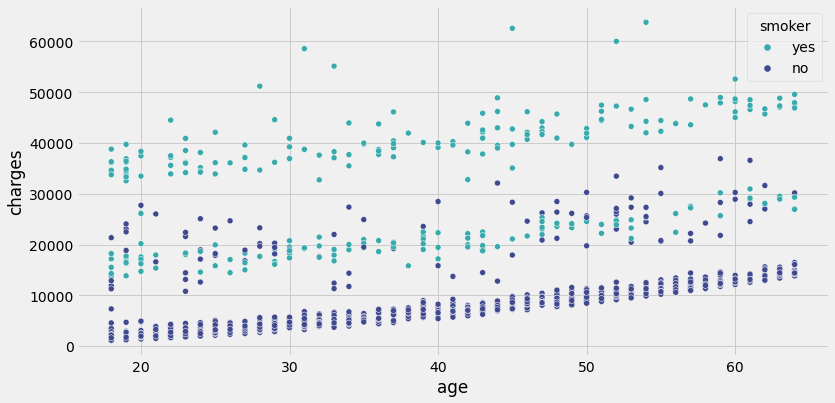

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x="age", y="charges", hue="smoker", palette="mako_r")
plt.show()

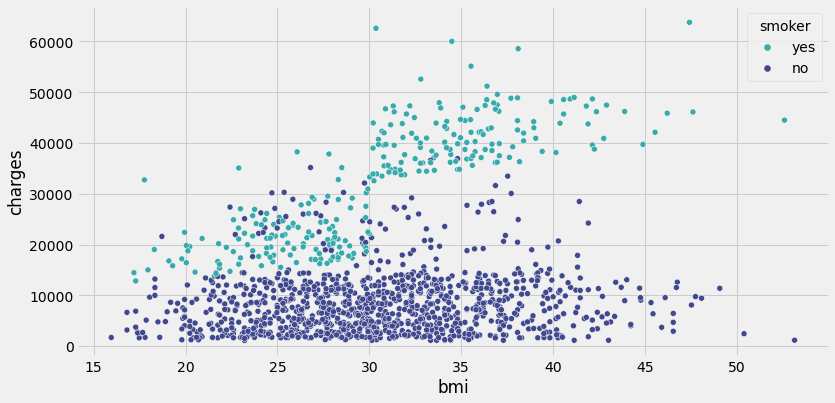

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x="bmi", y="charges", hue="smoker", palette="mako_r")
plt.show()

In [12]:
num_cols = data[['age', 'bmi', 'children']]

for col in num_cols :
    
    mean = data[col].mean()
    std = data[col].std()
    
    max_val = mean + 3*std
    min_val = mean - 3*std
    
    outliers = data[ (data[col]>max_val) | (data[col]<min_val)].index
    
    data.drop(outliers, axis=0, inplace=True)

In [13]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.119062,0.058319,0.299554
bmi,0.119062,1.000000,0.027706,0.203195
children,0.058319,0.027706,1.000000,0.090870
charges,0.299554,0.203195,0.090870,1.000000


# Prepare the dataset for training

In [14]:
data = pd.get_dummies(data)

In [15]:
children_dummies = pd.get_dummies(data.children, 
                                   prefix='children')

In [16]:
data = pd.concat([data,children_dummies], axis=1)

In [17]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,0,1,0,0,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,1,0,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,1,0,0,0,0


In [18]:
data.drop(['children', 'sex_male', 'smoker_no', 'region_southwest'],
          axis=1, inplace=True)

In [19]:
normalized_data = preprocessing.normalize(data, axis=0)
scaled_df = pd.DataFrame(normalized_data, columns=data.columns)
scaled_df.head(1)

,age,bmi,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,children_0,children_1,children_2,children_3,children_4
0,0.012552,0.024655,0.025811,0.039103,0.060634,0.0,0.0,0.0,0.041812,0.0,0.0,0.0,0.0


In [20]:
targets = scaled_df[['charges']]
scaled_df.pop('charges')
inputs = scaled_df

In [21]:
# Extract input & outupts as numpy arrays
inputs_array = inputs.to_numpy()
targets_array = targets.to_numpy()

In [22]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs_array)
targets = torch.from_numpy(targets_array)
print(inputs)
print(targets)
inputs.shape, targets.shape

tensor([[0.0126, 0.0247, 0.0391,  ..., 0.0000, 0.0000, 0.0000],
        [0.0119, 0.0298, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0185, 0.0292, 0.0000,  ..., 0.0000, 0.0798, 0.0000],
        ...,
        [0.0119, 0.0326, 0.0391,  ..., 0.0000, 0.0000, 0.0000],
        [0.0139, 0.0228, 0.0391,  ..., 0.0000, 0.0000, 0.0000],
        [0.0403, 0.0257, 0.0391,  ..., 0.0000, 0.0000, 0.0000]],
       dtype=torch.float64)
tensor([[0.0258],
        [0.0026],
        [0.0068],
        ...,
        [0.0025],
        [0.0031],
        [0.0445]], dtype=torch.float64)


(torch.Size([1316, 12]), torch.Size([1316, 1]))

In [23]:
inputs = torch.rand_like(inputs, dtype=torch.float) 
targets = torch.rand_like(targets, dtype=torch.float) 
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [24]:
dataset = TensorDataset(inputs, targets)
dataset[0:2]

(tensor([[0.2858, 0.2738, 0.9797, 0.3069, 0.4109, 0.4271, 0.9635, 0.8234, 0.7566,
          0.4475, 0.0998, 0.1380],
         [0.2851, 0.5779, 0.2761, 0.0789, 0.0621, 0.0465, 0.7669, 0.4610, 0.4522,
          0.1667, 0.3960, 0.8545]]),
 tensor([[0.8004],
         [0.3516]]))

In [25]:
num_rows = 1316
val_percent =  0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(1053, 263)

In [26]:
train_ds, test_ds = random_split(train_ds, [738, 315])

In [27]:
batch_size = 10
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
test_loader = DataLoader(test_ds, batch_size)


In [28]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[0.7718, 0.0779, 0.4487, 0.2778, 0.0115, 0.8546, 0.6111, 0.3022, 0.4631,
         0.8158, 0.7793, 0.7238],
        [0.4271, 0.9134, 0.4839, 0.6521, 0.8883, 0.6720, 0.3827, 0.9472, 0.3757,
         0.2791, 0.5181, 0.2594],
        [0.2663, 0.0791, 0.6070, 0.3079, 0.8590, 0.6749, 0.0611, 0.1390, 0.8922,
         0.0710, 0.6542, 0.5052],
        [0.9160, 0.6750, 0.1001, 0.6729, 0.6066, 0.2879, 0.8007, 0.7171, 0.6361,
         0.1712, 0.0291, 0.5179],
        [0.7320, 0.3400, 0.3864, 0.8709, 0.4685, 0.5531, 0.4910, 0.6718, 0.4340,
         0.9008, 0.5701, 0.2860],
        [0.2232, 0.5923, 0.5116, 0.6358, 0.1253, 0.9976, 0.8542, 0.7350, 0.2582,
         0.0911, 0.1989, 0.4671],
        [0.3840, 0.6619, 0.1700, 0.0561, 0.0600, 0.0917, 0.6257, 0.9566, 0.4978,
         0.0789, 0.6164, 0.4473],
        [0.3609, 0.3783, 0.2679, 0.0408, 0.4647, 0.4355, 0.8121, 0.2222, 0.3829,
         0.5520, 0.3838, 0.8260],
        [0.2252, 0.8991, 0.0546, 0.2331, 0.8754, 0.3213, 0.3267, 0.5327,

# Create a Linear Regression Model

In [29]:
input_size = 12
output_size = 1

In [30]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(input_size, 5),
                      nn.ReLU(),
                      nn.Linear(5, 3),
                      nn.ReLU(),
                      nn.Linear(3, output_size))          
        
    def forward(self, xb):
        out = self.linear(xb)                          
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.mse_loss(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.mse_loss(out, targets)                            
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [31]:
model = InsuranceModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.2250,  0.2834, -0.1054, -0.2196,  0.1819,  0.1929, -0.1208, -0.1869,
          -0.0746,  0.2686,  0.1125, -0.0537],
         [-0.2021, -0.1978, -0.0960,  0.2590,  0.0265, -0.1667, -0.1328,  0.1312,
           0.1809, -0.0773,  0.2235, -0.1953],
         [ 0.0828,  0.0525, -0.2384, -0.2397,  0.0519, -0.1328, -0.2351,  0.1258,
           0.0255, -0.0504, -0.2234,  0.2052],
         [ 0.0984,  0.2175, -0.1532, -0.1768, -0.0534, -0.1338,  0.2454,  0.1431,
          -0.1557,  0.1510,  0.2417, -0.2879],
         [-0.1550, -0.2410, -0.0436, -0.2133,  0.2691,  0.1860,  0.1553,  0.1668,
           0.1836, -0.2720, -0.2804,  0.2034]], requires_grad=True),
 Parameter containing:
 tensor([0.1814, 0.1892, 0.1978, 0.1789, 0.1827], requires_grad=True),
 Parameter containing:
 tensor([[-0.4404,  0.0092,  0.3889, -0.0666, -0.3812],
         [ 0.3178,  0.0835, -0.2738, -0.3157, -0.0388],
         [ 0.3821,  0.1694,  0.1006, -0.3203, -0.2658]], requires_grad=True),
 Pa

# Train the model to fit the data

In [32]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [33]:
val_losse = evaluate(model, val_loader)
val_losse

{'val_loss': 0.44099313020706177}

In [34]:
history1 = fit(300,  0.001, model, train_loader, val_loader)

Epoch [20], val_loss: 0.0870
Epoch [40], val_loss: 0.0852
Epoch [60], val_loss: 0.0852
Epoch [80], val_loss: 0.0852
Epoch [100], val_loss: 0.0852
Epoch [120], val_loss: 0.0852
Epoch [140], val_loss: 0.0852
Epoch [160], val_loss: 0.0852
Epoch [180], val_loss: 0.0851
Epoch [200], val_loss: 0.0852
Epoch [220], val_loss: 0.0852
Epoch [240], val_loss: 0.0852
Epoch [260], val_loss: 0.0852
Epoch [280], val_loss: 0.0852
Epoch [300], val_loss: 0.0852


In [35]:
history2 = fit(300,  0.001, model, train_loader, val_loader)

Epoch [20], val_loss: 0.0852
Epoch [40], val_loss: 0.0852
Epoch [60], val_loss: 0.0852
Epoch [80], val_loss: 0.0852
Epoch [100], val_loss: 0.0852
Epoch [120], val_loss: 0.0852
Epoch [140], val_loss: 0.0852
Epoch [160], val_loss: 0.0852
Epoch [180], val_loss: 0.0852
Epoch [200], val_loss: 0.0852
Epoch [220], val_loss: 0.0852
Epoch [240], val_loss: 0.0852
Epoch [260], val_loss: 0.0852
Epoch [280], val_loss: 0.0852
Epoch [300], val_loss: 0.0852


In [36]:
history3 = fit(300,  0.001, model, train_loader, val_loader)

Epoch [20], val_loss: 0.0853
Epoch [40], val_loss: 0.0853
Epoch [60], val_loss: 0.0853
Epoch [80], val_loss: 0.0853
Epoch [100], val_loss: 0.0853
Epoch [120], val_loss: 0.0853
Epoch [140], val_loss: 0.0853
Epoch [160], val_loss: 0.0854
Epoch [180], val_loss: 0.0854
Epoch [200], val_loss: 0.0854
Epoch [220], val_loss: 0.0854
Epoch [240], val_loss: 0.0854
Epoch [260], val_loss: 0.0854
Epoch [280], val_loss: 0.0854
Epoch [300], val_loss: 0.0854


In [37]:
val_losse_0 = evaluate(model, val_loader)
val_losse_0

{'val_loss': 0.08542202413082123}

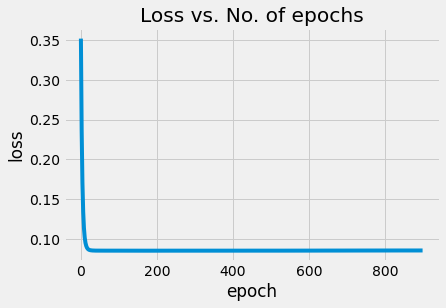

In [38]:
history = history1 + history2 + history3 
losses = [result['val_loss'] for result in history]
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.rcParams['figure.facecolor'] = 'white'
plt.title('Loss vs. No. of epochs');

# Make predictions using the trained model

In [39]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [40]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([0.4647, 0.9184, 0.1568, 0.0351, 0.1370, 0.2252, 0.4505, 0.2770, 0.1420,
        0.0612, 0.4497, 0.6287])
Target: tensor([0.4572])
Prediction: tensor(0.4886)


In [41]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([0.3051, 0.1648, 0.9204, 0.1403, 0.5460, 0.4125, 0.4427, 0.6733, 0.8235,
        0.8808, 0.0825, 0.0830])
Target: tensor([0.4026])
Prediction: tensor(0.4806)


In [42]:
test_loss = evaluate(model, test_loader)
test_loss

{'val_loss': 0.08207732439041138}